## Import

In [1]:
%matplotlib inline
import os 
from glob import glob

from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model, model_from_json

import sys
import pickle
import gzip

2023-06-22 05:30:23.886505: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 05:30:34.817997: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-22 05:30:54.371790: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/lib:/usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-06-22 05

In [2]:
def init_gpu():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        except RuntimeError as e:
            print(e)

## Set hyper parameter

In [3]:
# Hyper Parameter 
batch_size = 64
data_height = 32 
data_width = 32
channel_n = 3
num_classes = 43

In [4]:
def data():
    with gzip.open('pickle/train_images.pickle', 'rb') as f:
        train_images = pickle.load(f)

    with gzip.open('pickle/train_labels.pickle', 'rb') as f:
        train_labels = pickle.load(f)

    with gzip.open('pickle/test_images.pickle', 'rb') as f:
        test_images = pickle.load(f)

    with gzip.open('pickle/test_labels.pickle', 'rb') as f:
        test_labels = pickle.load(f)


    return train_images, train_labels, test_images, test_labels

In [5]:
def create_model(train_images, train_labels, test_images, test_labels):
    model = models.Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(data_height, data_width, 3)))
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    
    
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
        metrics=["accuracy"])
    
    return model

In [6]:
init_gpu()

X_train, Y_train, X_test, Y_test = data()

model = create_model(X_train, Y_train, X_test, Y_test)

model.summary()

2023-06-22 05:31:35.890034: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22334 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:31:00.0, compute capability: 8.6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [7]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/20


2023-06-22 05:31:42.966551: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-06-22 05:31:46.339319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2023-06-22 05:31:47.923317: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


613/613 [==============================] - 16s 10ms/step - loss: 1.0318 - accuracy: 0.7137 - val_loss: 0.2081 - val_accuracy: 0.9466
Epoch 2/20
613/613 [==============================] - 5s 8ms/step - loss: 0.1737 - accuracy: 0.9495 - val_loss: 0.1434 - val_accuracy: 0.9641
Epoch 3/20
613/613 [==============================] - 5s 8ms/step - loss: 0.1058 - accuracy: 0.9691 - val_loss: 0.1051 - val_accuracy: 0.9727
Epoch 4/20
613/613 [==============================] - 5s 8ms/step - loss: 0.0791 - accuracy: 0.9778 - val_loss: 0.0966 - val_accuracy: 0.9758
Epoch 5/20
613/613 [==============================] - 5s 9ms/step - loss: 0.0612 - accuracy: 0.9816 - val_loss: 0.0816 - val_accuracy: 0.9814
Epoch 6/20
613/613 [==============================] - 5s 8ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0915 - val_accuracy: 0.9776
Epoch 7/20
613/613 [==============================] - 5s 8ms/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0737 - val_accuracy: 0.9794
Epoch 8/20
613/

In [11]:
model_json = model.to_json()

with open("model/model.json", "w") as json_file : 
    json_file.write(model_json)

model.save("model/model.h5")

In [12]:
model = models.load_model("model/model.h5")
model.evaluate(X_test, Y_test, verbose=2)

395/395 - 2s - loss: 0.0926 - accuracy: 0.9856 - 2s/epoch - 4ms/step


[0.09256289899349213, 0.985589861869812]

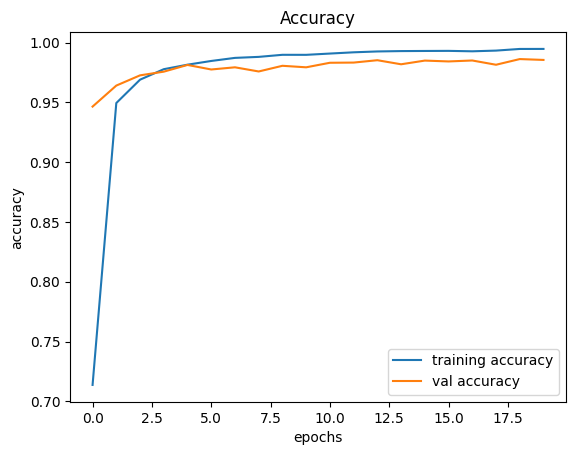

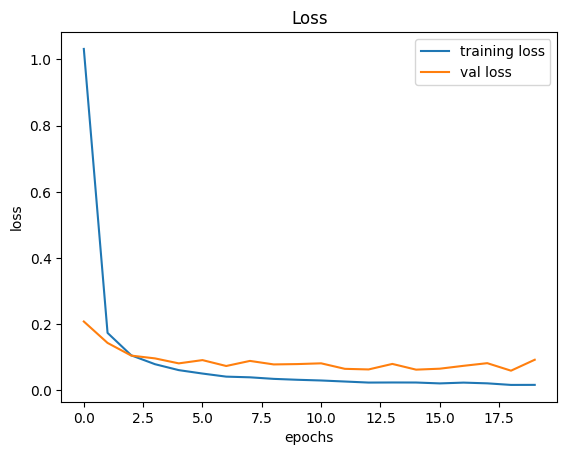

In [16]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

1/1 [==============================] - 0s 64ms/step


/tmp/ipykernel_23048/4239232308.py:23: RuntimeWarning: invalid value encountered in divide
  feature_image /= feature_image.std ()


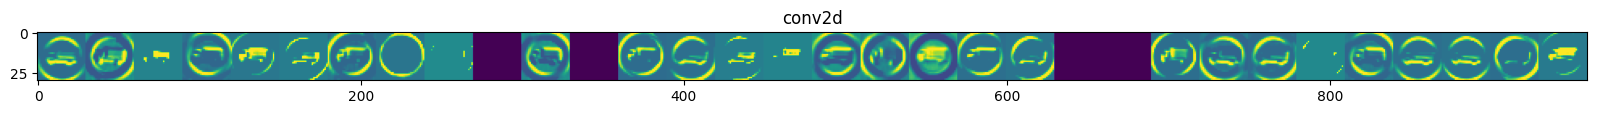

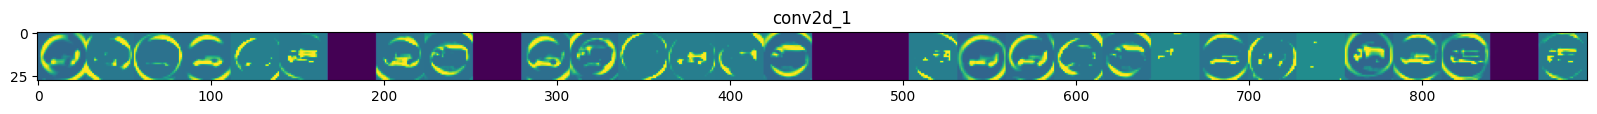

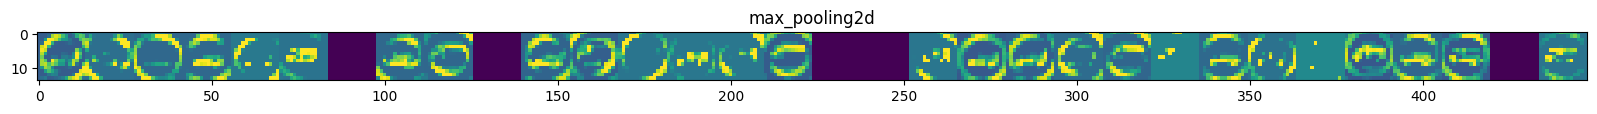

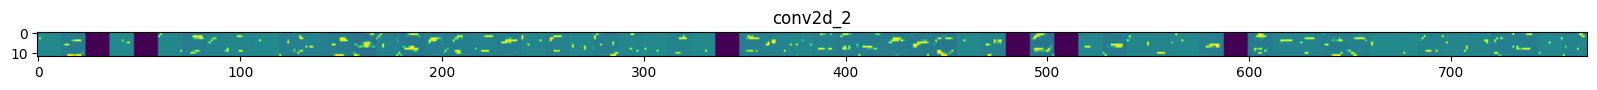

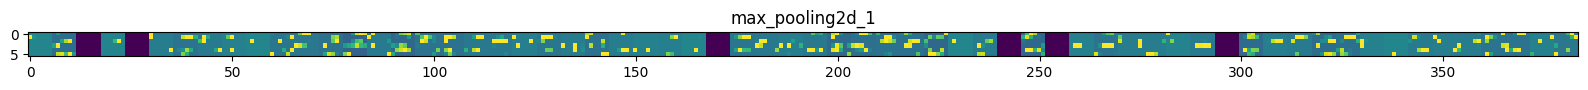

In [109]:
# Display intermediate feature maps
idxs = [0, 1, 2, 4, 5]
layer_names = [model.layers[i].name for i in idxs]
layer_outputs = [model.layers[i].output for i in idxs]

feature_map_model = models.Model(inputs=model.input, outputs=layer_outputs)
x = X_test[0]
x = x.reshape((1,) + x.shape)

feature_maps = feature_map_model.predict(x)

for layer_name, feature_map in zip(layer_names, feature_maps):
    k = feature_map.shape[-1]
    size=feature_map.shape[1]
    
    image_belt = np.empty((size, size*k))
    
    for i in range(k):
        feature_image = feature_map[0, :, :, i]
        feature_image -= feature_image.mean()
        feature_image /= feature_image.std ()
        feature_image *=  64
        feature_image += 128
        feature_image = np.clip(feature_image, 0, 255).astype('uint8')
        
        image_belt[:, i * size : (i + 1) * size] = feature_image    
    
    scale = 20. / k
    plt.figure( figsize=(scale * k, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( image_belt, aspect='auto')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


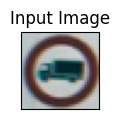

In [132]:
#Display Original Image
x = X_test[0] / 255

scale = 1
plt.figure(figsize=(scale, scale) )
plt.title ("Input Image")
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.imshow(x, aspect='auto')